비정형 데이터 분석에 용이하나 과적합에 유의할 것<br>
활성함수 경사도 소실 문제 : 활성함수가 반복적으로 들어있기 때문에 경사도 계산이 누적 오류역전파 성능이 나빠질 가능성이 있음
그이유는 활성함수의 입력이 크면 경사도가 작아지기 때문
-Relu와 Sigmoid 비교 Relu(소실 발생 가능성 낮음) Sigmoid(소실 발생 가능성이 높음)

In [1]:
##############################################
# Modeling
##############################################
from keras import layers, models

#연쇄 방식 모델링 객체지향형 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', 
                 input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', 
                 name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

Using TensorFlow backend.


In [2]:
##############################################
# Data
##############################################
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 257us/step - loss: 0.3622 - acc: 0.8952 - val_loss: 0.1816 - val_acc: 0.9495
Epoch 2/5
48000/48000 [==============================] - 4s 83us/step - loss: 0.1554 - acc: 0.9539 - val_loss: 0.1347 - val_acc: 0.9598
Epoch 3/5
48000/48000 [==============================] - 4s 93us/step - loss: 0.1097 - acc: 0.9673 - val_loss: 0.1101 - val_acc: 0.9665
Epoch 4/5
48000/48000 [==============================] - 6s 124us/step - loss: 0.0837 - acc: 0.9752 - val_loss: 0.1062 - val_acc: 0.9669
Epoch 5/5
10000/10000 [==============================] - 1s 105us/step
Test Loss and Accuracy -> [0.09542875204992014, 0.9679000037908554]


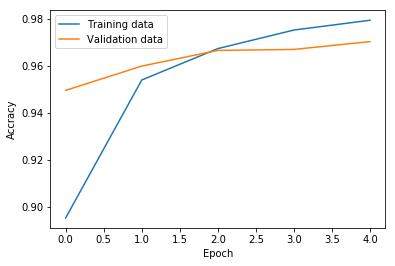

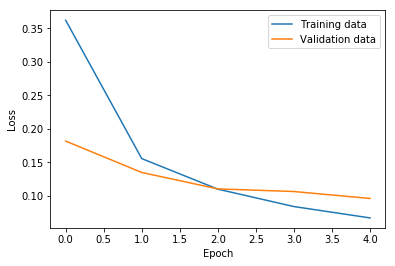

In [3]:
##############################################
# Main
##############################################
import matplotlib.pyplot as plt
%matplotlib inline

def main():
    Nin = 784 #입력
    Nh_l = [100, 50] #신경망 hidden node 100개 50개로 
    number_of_class = 10 #0 ~ 9
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(Nin, Nh_l, Nout)
    history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    plt.show()
    
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    plt.show()

if __name__ == '__main__':
    main()